- Bernoulli
$$ \phi \in [0,1] $$

In [56]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import PercentFormatter
import math


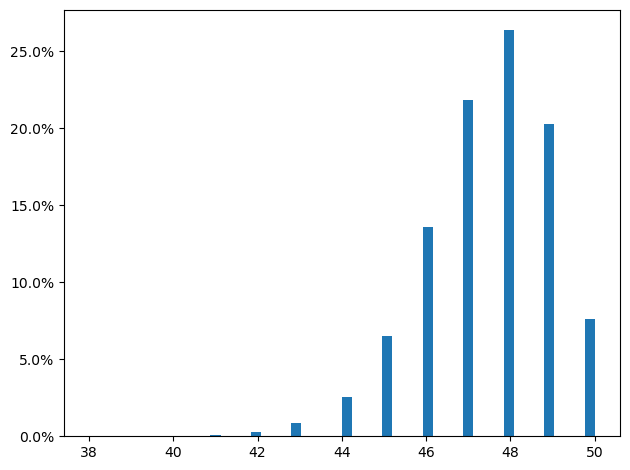

In [25]:
d = (torch.rand(100000, 50) < 0.95).sum(dim=1)
fig, axs = plt.subplots(1, 1, tight_layout=True)

axs.hist(d, bins=50)
axs.yaxis.set_major_formatter(PercentFormatter(xmax=100000))

- binomial distribution
  - If the random variable x follows the binomial distribution with parameters $ n \in \N $ and $ p \in [0, 1] $, we write $ X \sim B(n, p) $.
  $$ f(k,n,p) = P(k;n,p) = \begin{pmatrix} n \\ k \end{pmatrix} p^k (1 - p)^{n-k} $$
  

In [30]:
def d(s, k, n):
  return math.comb(n, k) * s**k * (1 - s)**(n-k)

In [43]:
from functools import partial
dp = partial(d, s=0.95, n=50)

In [48]:
k = torch.arange(0, 51, dtype=torch.int64)
density = list(map(lambda e: d(0.95, e, 50).item(), k))

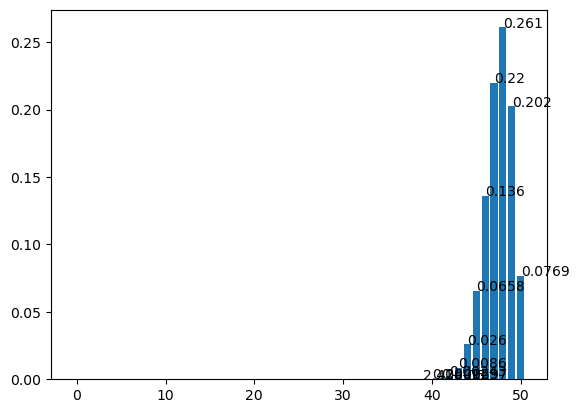

In [55]:
plt.bar(range(0, 51), density)
for idx, dn in enumerate(density):
  if dn > 0.00001:
    plt.text(idx, dn, f'{dn:>.3}')

In [68]:
from ipywidgets import interact
import numpy as np

plt.figure(figsize=(10, 7))
colors = ['blue'] * 48 + ['red'] + ['blue'] * 2

@interact(x=(0.0, 1.0, 0.005))
def rshow(x):
  k = torch.arange(0, 51, dtype=torch.int64)
  density = list(map(lambda e: d(x, e, 50).item(), k))
  plt.ylim((0, 0.5))
  plt.bar(range(0, 51), density, color= colors)

<Figure size 1000x700 with 0 Axes>

interactive(children=(FloatSlider(value=0.5, description='x', max=1.0, step=0.005), Output()), _dom_classes=('…

In [69]:
# variance of bernoulli distribution
# let p(x) = 0.4, then mean is 0.4
# var is (4*(1-0.4)**2 + 6*(0-0.4)**2)/10
(4*(1-0.4)**2 + 6*(0-0.4)**2)/10

0.24000000000000005

In [70]:
0.4*(1-0.4)

0.24